In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
#import Data and remove duplicates
wine_frame = pd.read_csv('./wine-reviews/wine_data_2.csv')
wine_frame= wine_frame[wine_frame.price <= 450]
wine_frame =wine_frame.drop_duplicates(subset='title', keep='first', inplace=False)


In [3]:
# getting averages from Californa Cabs
cali_cab =wine_frame[ wine_frame.province == 'California']
cali_cab =cali_cab[cali_cab.variety =='Cabernet Sauvignon']
cali_cab_above_90_avg = []
for x in range (80,101):
    cali_cab_above_90 =cali_cab[cali_cab.points == x]
    cali_cab_above_90_avg.append((x,cali_cab_above_90.price.mean(),cali_cab_above_90.price.count())) 

In [4]:
# getting averages from Washington Cabs
wa_cab =wine_frame[ wine_frame.province == 'Washington']
wa_cab =wa_cab[wa_cab.variety =='Cabernet Sauvignon']
wa_cab_above_90_avg = []
for x in range (80,101):
    wa_cab_above_90 =wa_cab[wa_cab.points == x]
    wa_cab_above_90_avg.append((x,wa_cab_above_90.price.mean(),wa_cab_above_90.price.count())) 

In [5]:

def gen_data(rating_list):
    X=[]
    Y=[]
    Z=[]
    for item in rating_list:
        X.append(item[0])
        Y.append(item[1])
        Z.append(item[2])
    return X, Y, Z

In [6]:
cali_rating, cali_price, cali_num_wines = gen_data(cali_cab_above_90_avg)
wa_rating,wa_price,wa_num_wines = gen_data(wa_cab_above_90_avg)

Text(0.5, 0.98, 'Categorical Plotting')

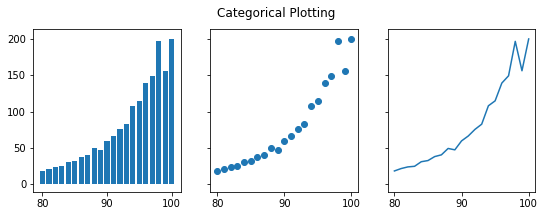

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
names=cali_rating
values=cali_price
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

## A bar chart of California Cabs produced by rating.
###### Note this is the number of different wines,  not the actual number of cases produced

In [8]:
cali_rating

[80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

Text(0.5, 0.98, 'Number of Californa Cabs produced by Rating')

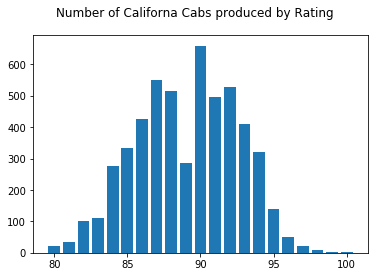

In [9]:
plt.bar(cali_rating,cali_num_wines)
plt.suptitle('Number of Californa Cabs produced by Rating')

## A bar chart of Washingon Cabs produced by rating.
###### Note this is the number of different wines,  not the actual number of cases produced

Text(0.5, 1.0, 'Number of Washington Cabs produced by Rating')

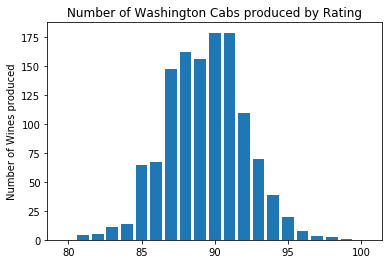

In [10]:
plt.bar(wa_rating,wa_num_wines)
plt.ylabel('Number of Wines produced')
plt.title('Number of Washington Cabs produced by Rating')

## This graph better displays the different production levels between Washington and California Cabernets

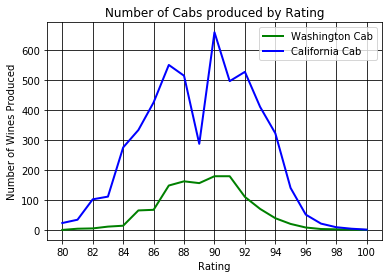

In [11]:
plt.plot(wa_rating,wa_num_wines,'g',label='Washington Cab',linewidth=2)
plt.plot(cali_rating,cali_num_wines,'b',label='California Cab',linewidth=2)
plt.ylabel('Number of Wines Produced')
plt.xlabel('Rating')
plt.title('Number of Cabs produced by Rating')
plt.xticks(np.arange(80, 102, 2.0))
plt.legend()
plt.grid(True,color='K')

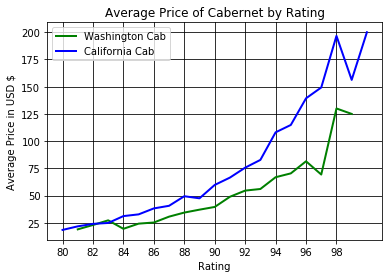

In [12]:
plt.plot(wa_rating,wa_price,'g',label='Washington Cab',linewidth=2)
plt.plot(cali_rating,cali_price,'b',label='California Cab',linewidth=2)
plt.ylabel('Average Price in USD $')
plt.xlabel('Rating')
plt.title('Average Price of Cabernet by Rating')
plt.xticks(np.arange(80,100, 2.0))
plt.legend()
plt.grid(True,color='K')

##### Why does the Washington price dip at 97 pts?
(data below)
* I would assume the price should be closer to 100.00 when looking at the rest of the graph
* There are only 3 wines in the section one from 2005,  I think the price was at under valued, if you notice the same wine 5 years later went up 13.00

In [13]:
wa_cab[wa_cab.points ==97][['title','price','points']]


,title,price,points
33841,Abeja 2007 Reserve Cabernet Sauvignon (Columbi...,85.0,97
48900,Betz Family 2005 Père de Famille Cabernet Sauv...,55.0,97
86718,Betz Family 2010 Père de Famille Cabernet Sauv...,68.0,97


## Why does the Californa Cab price dip at 99pts?
(data below)
* I would assume the price should be over 200
* I would like to see the volume of cases produced to see if the amount produced affected the price point
* In the Trefethen 2005 case, it was priced at 100.00, I am not sure if they rebranded it to the HaLo from reserve  in 2007 with a price jump to 175.00

In [14]:
cali_cab[cali_cab.points>=99][['title','price','points']]

,title,price,points
45798,Cardinale 2006 Cabernet Sauvignon (Napa Valley),200.0,100
107901,Venge 2008 Family Reserve Cabernet Sauvignon (...,125.0,99
116141,Alpha Omega 2012 Stagecoach Vineyard Cabernet ...,250.0,99
121885,David Arthur 2009 Elevation 1147 Estate Cabern...,150.0,99
128265,Trefethen 2005 Reserve Cabernet Sauvignon (Oak...,100.0,99


In [15]:
trefethen=cali_cab[cali_cab.winery == 'Trefethen'][['title','price','points']].sort_values(by='title')
trefethen

,title,price,points
128268,Trefethen 2005 Estate Cabernet Sauvignon (Oak ...,50.0,97
128265,Trefethen 2005 Reserve Cabernet Sauvignon (Oak...,100.0,99
126515,Trefethen 2007 Cabernet Sauvignon (Oak Knoll D...,55.0,92
85318,Trefethen 2007 HaLo Cabernet Sauvignon (Oak Kn...,175.0,95
108650,Trefethen 2008 HaLo Cabernet Sauvignon (Oak Kn...,175.0,95
62104,Trefethen 2009 Estate Grown Cabernet Sauvignon...,60.0,91
42389,Trefethen 2009 Estate Grown Reserve Cabernet S...,100.0,93
45097,Trefethen 2011 Estate Cabernet Sauvignon (Oak ...,60.0,85
61203,Trefethen 2012 Cabernet Sauvignon (Oak Knoll D...,60.0,90
42809,Trefethen 2013 Cabernet Sauvignon (Oak Knoll D...,60.0,90


In [16]:
price = []
rating= []
temp=cali_cab['points']
for x in temp:
    rating.append(x)
temp=cali_cab['price']
for x in temp:
    price.append(x)


In [17]:
len(price)

5294

In [18]:
len(rating)

5294

Text(0.5, 1.0, 'Number of Washington Cabs produced by Rating')

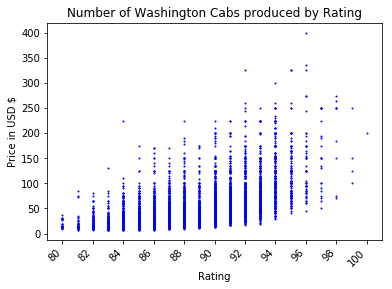

In [19]:
plt.plot(rating,price,'bo', markersize=1)
plt.ylabel('Price in USD $')
plt.xlabel('Rating')
plt.xticks(np.arange(min(rating), max(rating)+1, 2.0))
plt.yticks(np.arange(0,450,50))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.title('Number of Washington Cabs produced by Rating')

In [20]:
betz=wa_cab[wa_cab.winery =='Betz Family'][['title','points','price']].sort_values(by=['title'])
betz


,title,points,price
48900,Betz Family 2005 Père de Famille Cabernet Sauv...,97,55.0
21718,Betz Family 2008 Père de Famille Cabernet Sauv...,95,60.0
125838,Betz Family 2009 Père de Famille Cabernet Sauv...,96,65.0
86718,Betz Family 2010 Père de Famille Cabernet Sauv...,97,68.0
76567,Betz Family 2011 Père de Famille Cabernet Sauv...,95,68.0
78857,Betz Family 2012 Le Parrain Cabernet Sauvignon...,93,135.0
118963,Betz Family 2012 Père de Famille Cabernet Sauv...,95,72.0
35991,Betz Family 2013 Père de Famille Cabernet Sauv...,91,75.0
15146,Betz Family 2014 Heart of the Hill Cabernet Sa...,93,110.0
51648,Betz Family 2014 Père de Famille Cabernet Sauv...,93,75.0


In [21]:
betz =betz.drop_duplicates(subset='title', keep='first', inplace=False)
betz

,title,points,price
48900,Betz Family 2005 Père de Famille Cabernet Sauv...,97,55.0
21718,Betz Family 2008 Père de Famille Cabernet Sauv...,95,60.0
125838,Betz Family 2009 Père de Famille Cabernet Sauv...,96,65.0
86718,Betz Family 2010 Père de Famille Cabernet Sauv...,97,68.0
76567,Betz Family 2011 Père de Famille Cabernet Sauv...,95,68.0
78857,Betz Family 2012 Le Parrain Cabernet Sauvignon...,93,135.0
118963,Betz Family 2012 Père de Famille Cabernet Sauv...,95,72.0
35991,Betz Family 2013 Père de Famille Cabernet Sauv...,91,75.0
15146,Betz Family 2014 Heart of the Hill Cabernet Sa...,93,110.0
51648,Betz Family 2014 Père de Famille Cabernet Sauv...,93,75.0


In [22]:
test=wa_cab[:2]
test

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
440,440,US,This wine is a blend of fruit from five differ...,NaN,89,38.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Walla Walla Vintners 2013 Cabernet Sauvignon (...,Cabernet Sauvignon,Walla Walla Vintners
555,555,US,Discovery Vineyard Cab makes up most of this w...,NaN,93,75.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Passing Time 2013 Cabernet Sauvignon (Horse He...,Cabernet Sauvignon,Passing Time
